In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras import layers
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
dataframe = pd.read_csv('/content/soybean.csv')

In [3]:
dataframe

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,april,?,?,?,?,?,upper-areas,?,?,?,...,?,?,?,?,?,?,?,?,?,2-4-d-injury
679,april,lt-normal,?,lt-norm,?,diff-lst-year,scattered,?,?,?,...,?,dna,?,?,?,?,?,?,rotted,herbicide-injury
680,june,lt-normal,?,lt-norm,?,diff-lst-year,scattered,?,?,?,...,?,dna,?,?,?,?,?,?,rotted,herbicide-injury
681,april,lt-normal,?,lt-norm,?,same-lst-yr,whole-field,?,?,?,...,?,dna,?,?,?,?,?,?,rotted,herbicide-injury


In [4]:
dataframe['class'].unique() # Todos os tipos diferentes de doenças em plantas

array(['diaporthe-stem-canker', 'charcoal-rot', 'rhizoctonia-root-rot',
       'phytophthora-rot', 'brown-stem-rot', 'powdery-mildew',
       'downy-mildew', 'brown-spot', 'bacterial-blight',
       'bacterial-pustule', 'purple-seed-stain', 'anthracnose',
       'phyllosticta-leaf-spot', 'alternarialeaf-spot',
       'frog-eye-leaf-spot', 'diaporthe-pod-&-stem-blight',
       'cyst-nematode', '2-4-d-injury', 'herbicide-injury'], dtype=object)

In [5]:
# Criar um objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar o LabelEncoder à coluna 'class'
dataframe['class_encoded'] = label_encoder.fit_transform(dataframe['class'])

In [6]:
# Lista com todas as labels das colunas
lista_labels = dataframe.drop(columns=['class','class_encoded'])
lista_labels = lista_labels.columns.tolist()

In [7]:
X = dataframe[lista_labels]
y = dataframe['class_encoded']

### Naive Bayes

In [8]:
# Transformar as colunas categóricas em variáveis dummy
X_encoded = pd.get_dummies(X, columns=lista_labels, drop_first=True)

In [9]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Criar um classificador Naive Bayes (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Treinar o classificador usando os dados de treino
nb_classifier.fit(X_train, y_train)

# Fazer previsões usando os dados de teste
y_pred = nb_classifier.predict(X_test)

# Calcular a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Naive Bayes: {accuracy:.2f}")

Acurácia do Naive Bayes: 0.96


### Rede Neural

In [10]:
X = dataframe[lista_labels]
y = dataframe['class_encoded']

In [11]:
# Converter colunas categóricas em one-hot encoding
X_encoded = pd.get_dummies(X, columns=lista_labels, drop_first=True)

# Pré-processamento dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
y_encoded = to_categorical(y)  # Transformar as classes em one-hot encoding

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Construir o modelo da rede neural
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # O número de neurônios de saída é igual ao número de classes

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6336      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 19)                627       
                                                                 
Total params: 9,043
Trainable params: 9,043
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Treinando a Rede Neural
%time history = model.fit(X_train, y_train,epochs=120,verbose=False,validation_split=0.2,batch_size=X_train.shape[0])

CPU times: user 7.84 s, sys: 182 ms, total: 8.03 s
Wall time: 14.5 s


In [13]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
Ein = 1 - accuracy
print('Ein: %0.4f' % (1 - accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
Eout = 1 - accuracy
print('Eout: %0.4f' % (1 - accuracy))
print('Generalização: %0.4f' % abs(Ein - Eout))

Ein: 0.0275
Eout: 0.0365
Generalização: 0.0090


In [14]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Acurácia de treino: %0.4f' % (accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Acurácia de teste: %0.4f' % (accuracy))

Acurácia de treino: 0.9725
Acurácia de teste: 0.9635


In [15]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Treino acc')
    plt.plot(x, val_acc, 'r', label='Validação acc')
    plt.title('Acurácia de treinamento e validação')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Treino loss')
    plt.plot(x, val_loss, 'r', label='Validação loss')
    plt.title('Erro de treinamento e validação')
    plt.legend()

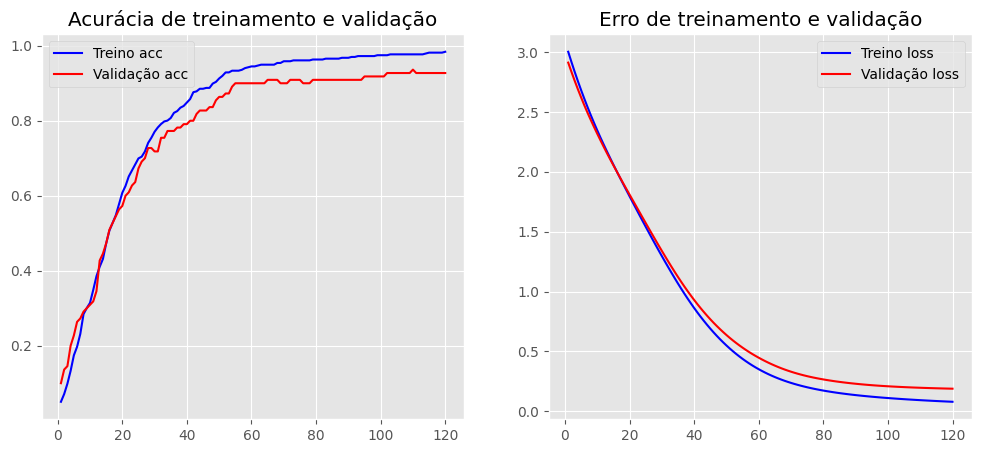

In [17]:
 plot_history(history)